# Logistic Regression for Fun: Phishing Detection

In [63]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import collections as ct

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import words
from nltk.corpus import wordnet

In [64]:
df = pd.read_csv('phishing_site_urls.csv')

df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [65]:
len(df)

549346

## High Level Exploration and Cleaning of the Data Frame

- here's a url that has some data cleaning code
    - https://www.kaggle.com/code/ashishkumarbehera/phishing-site-prediction

In [66]:
len(df)

549346

- (below) let's create a column where `1` is a URL identified as phishing, and `0` is a "good" url.

In [67]:
df['phishing'] = (df.Label == 'bad').astype(int)

In [68]:
df[::10000]

,URL,Label,phishing
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1
10000,paypal.com.us-cgi-bin-webscr-cmd.login.5885d80...,bad,1
20000,www.cpiano.com/css/login.htm?us.battle.net/log...,bad,1
30000,buykey.byethost13.com/,bad,1
40000,www.bjcurio.com/js/index.htm?ref=jgmmabgus.bat...,bad,1
50000,www.cyberhorse.net.au/csl/,good,0
60000,www.cse.iitk.ac.in/users/amit/index.html,good,0
70000,ecnow.com/Internet_Marketing.htm,good,0
80000,www.fgroupsoft.com/Traysafe/,good,0
90000,www.xlcus.co.uk/software/acorn/index.shtml#pac...,good,0


In [69]:
df.drop('Label', axis = 1)

,URL,phishing
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,mail.printakid.com/www.online.americanexpress....,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1
...,...,...
549341,23.227.196.215/,1
549342,apple-checker.org/,1
549343,apple-iclods.org/,1
549344,apple-uptoday.org/,1


- (below) let's look at the "good" urls and see if we need to do any data cleaning

In [70]:
df[df['phishing'] == 0].iloc[::10000]

,URL,Label,phishing
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,0
57904,www.marinesurveyor.com/ogden/,good,0
67904,tools.ietf.org/html/rfc2010,good,0
77904,infohost.nmt.edu/tcc/help/pubs/lang.html,good,0
87904,www.voicecallcentral.com/index.htm,good,0
140671,adirondackexplorer.org/,good,0
150671,blog.revolutionsoccer.net/?p=7383,good,0
160671,companydatabase.org/c/retail-lumber-other-buil...,good,0
170671,en.wikipedia.org/wiki/2010_Portland_Timbers_se...,good,0
180671,en.wikipedia.org/wiki/Sole_proprietorship,good,0


- (below) we suspect there is a data quality issue.  Here is a URL that looks ok.

In [71]:
df["URL"].iloc[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [72]:
df["URL"].str.len().iloc[0]

225

In [73]:
normal_chars = string.printable

sum(v for k, v in ct.Counter(df["URL"].iloc[0]).items() if k in normal_chars)

225

- (below) here is a URL that we are concerned about.

In [74]:
df["URL"].iloc[18232]

"www\x0eeira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùu\x03Ë\nÓ\x176(rTÃ\x06u\x0f\x8f\x7fæ\x82\x0c\x99=g\x810¾\x96÷mÖi\x12Ó-;\x9bXZ\\%êýü\x05Éfn&\x87\\°%7õÙ:¹u\x96\x0f\x161ÌÑêFÄòW<\x18\x80$cï\x86¦t[\x910ò\x9f>Þj\x93®ÆeV2\x92à\x1bpù-íàÇ$E¤ZëÈ²ú\x16SÌ¶\tp\x1fáSò°i°vþ[«³»]¹\rjlÛW¿\x95\x9b\x8a]ø¾µj¿;\x08·ªo!\x94ÒPì\xa0·Ê\x8bïH§#'\x823\x1bø@CÄR\x02õ²çÇ\x17\x17Ý®\x16ö\x1d\x7fQBÇÆg`Èå\x85Zéê\xa0D\x1cîÂm\x9e®ÎÝQó*x;9?\x0fÁ\x19\x81Òâ\x88\x99bùt\x1bÖ\x07\x96Ù®mÞ\x80N\x94\x97P¯°^M\x8eQ\n(\x1f-\x04\x06§;¬ÔAèUè\x99é\\\x10¨ø\x95íÌ\x88dB\\\x01\x8b\x12[q½=ÿVuÃ\x01»\x07râæH\x1bä\x8dô/µ}\x85»7!2=´ÂÏ4¿ª¡j91\x04\x86]"

In [75]:
df["URL"].str.len().iloc[18234]

33

- (below) a function for identifying which rows contain these bad URLs.

In [76]:
def non_printable_indices(col):
    """
    Returns a vector of indices for elements that contain non-printable characters.
    """
    indices = []
    for i, s in col.items():
        if any(c not in string.printable for c in s):
            indices.append(i)
    return indices

In [77]:
bad_URL_rows = non_printable_indices(df["URL"])

In [78]:
bad_df = df.iloc[bad_URL_rows]

In [79]:
bad_df.head()

,URL,Label,phishing
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,0
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,0
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,0
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,0
18235,è kvüDâQÎé4¼Ò©,bad,1


- (below) the weird urls are a little less represented in the "non-phishing" category, but they represent a small portion of total rows so we're going to remove them.

In [80]:
(bad_df['phishing'] == 1).sum()/(bad_df['phishing'] == 0).sum()

0.13279132791327913

In [81]:
(df['phishing'] == 1).sum()/(df['phishing'] == 0).sum()

0.3980973419796195

- (below) the actual removal...

In [82]:
df = df.drop(bad_URL_rows)

<AxesSubplot:xlabel='phishing', ylabel='count'>

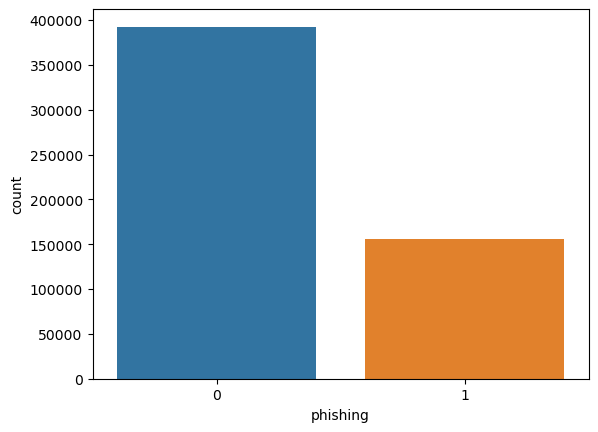

In [83]:
sns.countplot(x="phishing",data=df)

## Feature Engineering
- (below) this is our first feature! a length count of characters.

In [84]:
df['url_length'] = df['URL'].str.len()

In [85]:
df.head()

,URL,Label,phishing,url_length
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,225
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,1,81
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,177
3,mail.printakid.com/www.online.americanexpress....,bad,1,60
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,1,116


- (below) create a tokenizer object that can be used to split text into tokens based on a regular expression pattern.

In [86]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [87]:
tokenizer.tokenize(df.URL[0]) 

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

- (below) lets apply the tokenizer to every record in df.URL 
   - NOTE:  a lambda function is a small anonymous function that can be defined inline without a name. It's a shorthand way to define a function that takes arguments, performs an operation on them, and returns a value, all in a single line of code.
   - basic syntac is `add = lambda x, y: x + y`
   - `add(3, 5)` will return 8

In [88]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

- (below) along with the tokenized column (which returns a list for each element, let's also create a column that holds concatenated string of the tokenized words instead.

In [89]:
df['text_token_conc'] = df['text_tokenized'].map(lambda l: ' '.join(l))

### Jonathan's Features
- (below) my first feature will be a count of the special characters in each URL.

In [90]:
punct_chars = string.punctuation

In [91]:
df['punct_count'] = df['URL'].apply(lambda string: sum(1 for c in string if c in punct_chars))

- (below) my second feature will count the words within each element of `df['text_tokenized']` that are also found in the english dictionary.
   - NOTE: the nltk library natively contains the words dictionary but may not be comprehensive or appropriate for all use cases. 

In [92]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonsch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jonsch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [93]:
df['num_english_words'] = df['text_tokenized'].apply(lambda tokens: sum([token in wordnet.words() for token in tokens]))

KeyboardInterrupt: 

- (above)  the .apply() method to apply a function that takes each list of tokens as input, and returns a scalar value representing the number of English words in the list.
- (above) we use .apply() instead of .map() because the input data is a DataFrame column that contains lists, not a Series of individual elements. 
   - The .apply() method can handle this type of input data, while the .map() method is designed for Series of individual elements.

- (below) my third feature will count the number of case changes in an URL.  I will normalize this by the length of the URL, which we already created earlier.
  - I will first remove all punctuation from the URL.
  - I will consider a case change to be a change from...
      - lower case to upper case.
      - lower case to number.
      - upper case to lower case.
      - upper case to number.
      - number to lower case.
      - number to upper case.

In [ ]:
def count_case_changes(string):
    no_punct = ''.join(c for c in string if c not in punct_chars and c != ' ')
    
    chg_counter = 0
    
    prev_char = ''
    
    for char in no_punct:
        if prev_char.islower() and char.isupper():
            chg_counter += 1
        elif prev_char.islower() and char.isdigit():
            chg_counter += 1
        elif prev_char.isupper() and char.islower():
            chg_counter += 1
        elif prev_char.isupper() and char.isdigit():
            chg_counter += 1
        elif prev_char.isdigit() and char.islower():
            chg_counter += 1
        elif prev_char.isdigit() and char.isupper():
            chg_counter += 1
        
        prev_char = char
    
    return chg_counter

In [ ]:
df['case_change_count'] = df.URL.map(lambda string: count_case_changes(string))

- (below) save my data frame for later use so we don't need to run the english word check again!

In [ ]:
df.head()

In [ ]:
df.to_pickle('phishing_df.pkl')

## Bryan Features 

In [ ]:
zip_filename = "phishing_df.zip"
pkl_filename = "phishing_df.pkl"

with zipfile.ZipFile(zip_filename) as z:
    with z.open(pkl_filename) as f:
        # load the PKL file into a pandas DataFrame
        df = pd.read_pickle(f)

In [ ]:
# Feature that deterimines whether www. is found in the string 

# add a column that is a 1 if the url contains www and 0 otherwise 
contains_www = df.assign(contains_www = df['URL'].apply(lambda x: 1 if 'www.' in x else 0))


In [ ]:
# Do the same but checks to see if the url starts with www. 
startswith_www = df.assign(startswith_www = df['URL'].apply(lambda x: 1 if x.startswith('www.') else 0))

In [ ]:
# Returns the number of characters after www
# filter down to strings that contain www. 
contains_www_filtered = contains_www.query('contains_www == 1')
# add column with count of characters after www. 
contains_www_filtered = contains_www_filtered.assign(count = contains_www_filtered['URL'].apply(lambda x: len(x.split('www.', 1)[-1])))
# convert to binary column ? 

In [ ]:
# median str len after www
str_len_median = contains_www_filtered['count'].median()
str_len_median
# 1 if str length is above median and zero if below 
contains_www_filtered = contains_www_filtered.assign(above_median = contains_www_filtered['count'] > str_len_median)
contains_www_filtered['above_median'] = contains_www_filtered['above_median'].astype(int)

In [ ]:
# Returns 1 if www is found more than once
multiple_www = df.assign(mult_www=df['URL'].apply(lambda x: x.count('www.') > 1))
multiple_www['mult_www'] = multiple_www['mult_www'].astype(int)
sum(multiple_www['mult_www'] == 1)/len(multiple_www)

In [ ]:
contains_www.head()

In [ ]:
df['contains_www'] = contains_www['contains_www']

In [ ]:
startswith_www.head()

In [ ]:
df['startswith_www'] = startswith_www['startswith_www']

In [ ]:
contains_www_filtered.head()

In [ ]:
df['chars_past_www'] = contains_www_filtered['count']
df['chars_past_www_above_median'] = contains_www_filtered['above_median']

In [ ]:
multiple_www.head()

In [ ]:
df['multi_www'] = multiple_www['mult_www']

In [ ]:
df.head()

In [ ]:
df.fillna(0, inplace=True)
df['chars_past_www'] = df['chars_past_www'].astype(int)
df['chars_past_www_above_median'] = df['chars_past_www_above_median'].astype(int)

In [ ]:
df.head()

In [ ]:
df = df[['phishing', 'url_length', 'num_english_words','punct_count', 'case_change_count','contains_www', 'startswith_www', 'chars_past_www', 'chars_past_www_above_median', 'multi_www', 'URL', 'text_tokenized', 'text_token_conc', 'Label']]

In [ ]:
df.head()

In [ ]:
df.to_pickle('phishing_df.pkl')

## Modeling
### Loading the pickle file.

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
zip_filename = "phishing_df.zip"
pkl_filename = "phishing_df.pkl"

with zipfile.ZipFile(zip_filename) as z:
    with z.open(pkl_filename) as f:
        # load the PKL file into a pandas DataFrame
        df = pd.read_pickle(f)

df.head()

,phishing,url_length,num_english_words,punct_count,case_change_count,contains_www,startswith_www,chars_past_www,chars_past_www_above_median,multi_www,URL,text_tokenized,text_token_conc,Label
0,1,225,16,32,31,0,0,0,0,0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...",nobell it ffb d dca cce f login SkyPe com en c...,bad
1,1,81,7,15,2,1,1,77,1,0,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,bad
2,1,177,15,19,25,0,0,0,0,0,serviciosbys.com/paypal.cgi.bin.get-into.herf....,"[serviciosbys, com, paypal, cgi, bin, get, int...",serviciosbys com paypal cgi bin get into herf ...,bad
3,1,60,5,8,0,1,0,37,1,0,mail.printakid.com/www.online.americanexpress....,"[mail, printakid, com, www, online, americanex...",mail printakid com www online americanexpress ...,bad
4,1,116,2,13,3,0,0,0,0,0,thewhiskeydregs.com/wp-content/themes/widescre...,"[thewhiskeydregs, com, wp, content, themes, wi...",thewhiskeydregs com wp content themes widescre...,bad


 - (below) one last check for missing or NA values.

In [117]:
null_counts = df.isnull().sum()

null_counts

phishing                       0
url_length                     0
num_english_words              0
punct_count                    0
case_change_count              0
contains_www                   0
startswith_www                 0
chars_past_www                 0
chars_past_www_above_median    0
multi_www                      0
URL                            0
text_tokenized                 0
text_token_conc                0
Label                          0
dtype: int64

In [118]:
na_counts = df.isna().sum()

na_counts

phishing                       0
url_length                     0
num_english_words              0
punct_count                    0
case_change_count              0
contains_www                   0
startswith_www                 0
chars_past_www                 0
chars_past_www_above_median    0
multi_www                      0
URL                            0
text_tokenized                 0
text_token_conc                0
Label                          0
dtype: int64

- (below) let's remove the text/tokenized columns to prepare for modeling.

In [119]:
df.columns

Index(['phishing', 'url_length', 'num_english_words', 'punct_count',
       'case_change_count', 'contains_www', 'startswith_www', 'chars_past_www',
       'chars_past_www_above_median', 'multi_www', 'URL', 'text_tokenized',
       'text_token_conc', 'Label'],
      dtype='object')

In [120]:
df_clean = df[['phishing', 'url_length', 'num_english_words','punct_count', 'case_change_count','contains_www', 'startswith_www', 'chars_past_www', 'chars_past_www_above_median', 'multi_www']]
df_clean.head()

,phishing,url_length,num_english_words,punct_count,case_change_count,contains_www,startswith_www,chars_past_www,chars_past_www_above_median,multi_www
0,1,225,16,32,31,0,0,0,0,0
1,1,81,7,15,2,1,1,77,1,0
2,1,177,15,19,25,0,0,0,0,0
3,1,60,5,8,0,1,0,37,1,0
4,1,116,2,13,3,0,0,0,0,0


In [121]:
df_clean.dtypes

phishing                       int32
url_length                     int64
num_english_words              int64
punct_count                    int64
case_change_count              int64
contains_www                   int64
startswith_www                 int64
chars_past_www                 int32
chars_past_www_above_median    int32
multi_www                      int32
dtype: object

### Train \ Val \ Test Split
- (below) train \ val \ test split.
- (below) remember, don't look at test until the very end!

In [122]:
df_full_train, df_test = train_test_split(df_clean, test_size=0.20, random_state=2023)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2023)

In [123]:
len(df_train)/len(df), len(df_val)/len(df), len(df_test)/len(df)

(0.5999985426139676, 0.20000072869301622, 0.20000072869301622)

- (below) optional, but reset the indices.

In [124]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

- (below) create response vectors. We use the .values method to get a numpy array which most modeling functions require.

In [125]:
type(df_train.phishing), type(df_train.phishing.values)

(pandas.core.series.Series, numpy.ndarray)

In [126]:
y_train = df_train.phishing.values
y_val = df_val.phishing.values
y_test = df_test.phishing.values

- (below) let's delete the response vector from these datasets so we don't accidently feed it into a model
- (below) we'll leave the phising variable in df_full_train in case we do some EDA.

In [127]:
del df_train['phishing']
del df_val['phishing']
del df_test['phishing']

### Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression

- (below) initial training of logistic regression model

In [129]:
df_train.head()

,url_length,num_english_words,punct_count,case_change_count,contains_www,startswith_www,chars_past_www,chars_past_www_above_median,multi_www
0,49,5,10,2,0,0,0,0,0
1,46,7,9,8,0,0,0,0,0
2,63,6,11,0,1,1,59,1,0
3,37,6,1,16,0,0,0,0,0
4,97,6,16,6,0,0,0,0,0


In [130]:
X_train = df_train.values

model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- (below) bias term.

In [131]:
w0 = model.intercept_[0] # its a 2d array, we only need 1 row tho.
w0

-0.9288565111474612

In [132]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

bias = sigmoid(w0)

print("bias: {}" .format(bias))

bias: 0.2831567611789344


- (above) without knowing anything about a URL, the probability it is a phishing site is thought to be 28.3%.

- (below) coefficients.

In [133]:
model.coef_[0].round(3) # same

array([-0.009,  0.147, -0.058,  0.072,  1.362, -2.705,  0.046, -0.275,
        3.482])

In [134]:
coefs = dict(zip(df_train.columns, model.coef_[0].round(3)))
coefs

{'url_length': -0.009,
 'num_english_words': 0.147,
 'punct_count': -0.058,
 'case_change_count': 0.072,
 'contains_www': 1.362,
 'startswith_www': -2.705,
 'chars_past_www': 0.046,
 'chars_past_www_above_median': -0.275,
 'multi_www': 3.482}

#### Predicting the validation set.

In [135]:
from sklearn.metrics import accuracy_score
from collections import Counter

- (below) hard predictions (0, 1)

In [136]:
X_val = df_val.values
model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

- (below) soft predictions (probabilities)
- (below) column 1 is the probability of no phishing, column 2 is the probability of phishing.

In [137]:
model.predict_proba(X_val)

array([[0.82433995, 0.17566005],
       [0.76437738, 0.23562262],
       [0.73484322, 0.26515678],
       ...,
       [0.75495842, 0.24504158],
       [0.76507225, 0.23492775],
       [0.79798972, 0.20201028]])

In [138]:
y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred

array([0.17566005, 0.23562262, 0.26515678, ..., 0.24504158, 0.23492775,
       0.20201028])

### Model Evaluation
#### Sub-Optimal Model Evaluation

- (below) our first decision rule will be a probability of 0.5

In [139]:
phishing_decision = (y_val_pred >= 0.5)
phishing_decision

array([False, False, False, ..., False, False, False])

- (below) our first accuracy measure

In [140]:
accuracy_score(y_val, y_val_pred >= 0.45)

0.7630207858925546

- (below) let's make a prediction table

In [141]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred
df_pred['prediction'] = phishing_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.175660,0,1,False
1,0.235623,0,0,True
2,0.265157,0,1,False
3,0.250126,0,0,True
4,0.254289,0,1,False
...,...,...,...,...
109781,0.212894,0,1,False
109782,0.335452,0,0,True
109783,0.245042,0,0,True
109784,0.234928,0,0,True


- (below) just double-checking that the model was able to predict some phishing sites...

In [142]:
df_pred[(df_pred['correct'] == True) & (df_pred['prediction'] == 1)]

,probability,prediction,actual,correct
12,0.999997,1,1,True
27,0.897044,1,1,True
29,0.793168,1,1,True
30,0.966198,1,1,True
53,0.578677,1,1,True
...,...,...,...,...
109692,0.923469,1,1,True
109695,0.636414,1,1,True
109709,0.866669,1,1,True
109762,0.986793,1,1,True


- (below) there shouldn't be in any predictions with a 1.0 probability.

In [143]:
Counter(y_val_pred >= 1.0)

Counter({False: 109782, True: 4})

#### Better Model Evaluation Practices

- (below) we need to be aware of class balance.

In [144]:
print('non-phishing sites: {}' .format(np.bincount(y_val)[0]))
print('phishing sites: {}' .format(np.bincount(y_val)[1]))
print('there are {:.2f} times as many non-phishing sites as phishing sites'.format(np.bincount(y_val)[0] / np.bincount(y_val)[1]))

non-phishing sites: 78457
phishing sites: 31329
there are 2.50 times as many non-phishing sites as phishing sites


- (below) accuracy predicting phishing sites...

In [145]:
df_pred[df_pred['actual'] == 1].correct.mean()

0.18589804973028184

- (below) accuracy predicting good sites...

In [146]:
df_pred[df_pred['actual'] == 0].correct.mean()

0.9914347986795314

##### Confusion Matrix

- (below) false negatives are sites we think are safe not but are actually phishing.
- (below) false positives are sites we think are phishing but are actually safe.

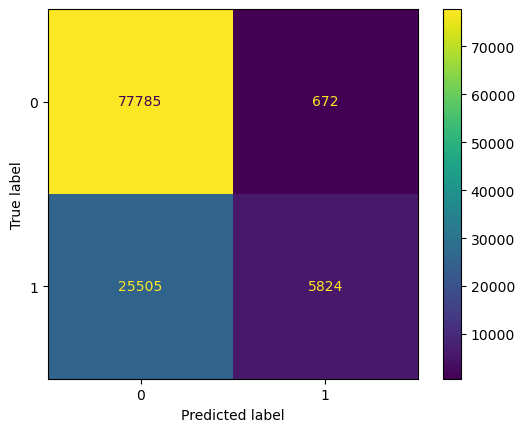

In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

t = 0.50

ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred >= t)
plt.show()

- (below) we can recover the accuracy by adding the true negative and true positive normalized values.

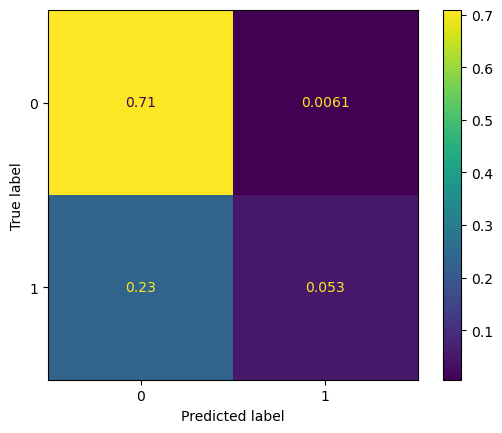

In [148]:
ConfusionMatrixDisplay.from_predictions(y_val, y_val_pred >= t, normalize = 'all')
plt.show()

##### ROC curve

In [149]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [150]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

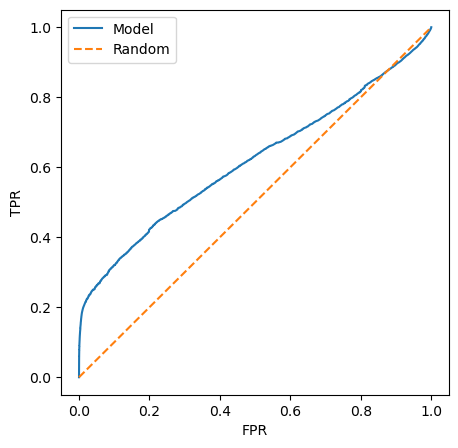

In [151]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

- (above) point 0,0: no false positives because we're assigning everything to class 0. 
- (above) point 0,0: No false negatives because we are getting all the true negative values by assigning EVERYTHING to class 0
- (above) point 1,1: high true positive rate because we're getting all the true positive values by assigning everything to class 1.
- (above) point 1,1: high false positive rate because we're making a lot of mistakes.
- (above) a good model looks like a rounded 90 degree corner.
- (above) a bad model will look similar to a diagonal curve.
- (above) if the model curve is inverted and below the diagonal line, then something went wrong. you probably need to switch your 1 and 0's.

In [152]:
roc_auc_score(y_val, y_val_pred)

0.6172599591401042

- (above) AUC under the random curve (diagonal line) is 0.5
- (above) AUC under the ideal curve (90 degree corner) is 1
- (above) in other words, AUC ranges from 0.5 to 1.0
- (above) INTERPRETATION: image you have your predictions and you have ordered them by their soft prediction value (probability)
    - now split this list into ordered subsets, one for those who churned and one for those who didn't.
    - AUC is the probabililty that the score is higher for a randomly selected positive (phishing) observation than a randomly selected negative (non-phishing) observation.

##### K-Fold Cross-Validation
-  Evaluating the same model on different subsets of data
-  Getting the average prediction and the spread within predictions
- (below) `train` and `predict` functions.
- (below) the C parameter is regularization strength and we will tune it later.

In [153]:
def train(df_train, y_train, C=1.0):
    X_train = df_train.values

    model = LogisticRegression(C=C, max_iter= 1000)
    model.fit(X_train, y_train) 
       
    return model

In [154]:
def predict(df_pred, model):
    X = df_pred.values
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

- (below) combine train and validation sets into a "full train" set.
- (below) Split the validation set into "K" different sets.
- (below) rule of thumb: K = 2-3 for large datasets, 5-10 for smaller datasets.
- (below) Use K-1 sets to train a model to predict the last set.
- (below) Do this K times. For K = 3, train set 1 and 2 to predict 3, train set 2 and 3 to predict 1, train set 1 and 3 to predict 2.
- (below) at each step, calculate ROC AUC
- (below) at the end, summarize these K values with a mean score and st.dev

In [155]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.shape

(439142, 9)

In [156]:
y_full_train  = np.concatenate((y_train, y_val))
y_full_train.shape

(439142,)

In [157]:
from sklearn.model_selection import KFold

- (below) kfold.split() creates a generator that be iterated through by using the next() function.

In [158]:
n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]

    y_train_fold = y_full_train[train_idx]
    y_val_fold = y_full_train[val_idx]

    model_fold = train(df_train_fold, y_train_fold)
    y_pred_fold = predict(df_val_fold, model_fold)

    auc = roc_auc_score(y_val_fold, y_pred_fold)
    scores.append(auc)

    print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.618 +- 0.000
0.619 +- 0.001
0.617 +- 0.002
0.617 +- 0.002
0.617 +- 0.002


### Tune the Model

In [159]:
from tqdm.auto import tqdm

- (above) tqdm displays how long a for loop will take to complete.

#### tune the decision threshold

In [160]:
thresholds = np.linspace(0, 1, 101)

n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores_sum = np.zeros((len(thresholds), 8))

for train_idx, val_idx in tqdm(kfold.split(df_full_train), total = n_splits, desc = "KFold iterations"):
    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]

    y_train_fold = y_full_train[train_idx]
    y_val_fold = y_full_train[val_idx]

    model_fold = train(df_train_fold, y_train_fold)
    y_pred_fold = predict(df_val_fold, model_fold)

    actual_positive = (y_val_fold == 1)
    actual_negative = (y_val_fold == 0)

    for i, t in enumerate(thresholds):

        predict_positive = (y_pred_fold >= t)
        predict_negative = (y_pred_fold < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Add the scores to the sum array
        scores_sum[i] += np.array([t, tp, fp, fn, tn, accuracy, precision, recall])

final_scores = scores_sum / n_splits

columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'accuracy', 'precision', 'recall/tpr']

final_scores_df = pd.DataFrame(final_scores, columns=columns)

final_scores_df['fpr'] = final_scores_df.fp / (final_scores_df.fp + final_scores_df.tn)

KFold iterations:   0%|          | 0/5 [00:00<?, ?it/s]

Text(0, 0.5, 'percent accuracy')

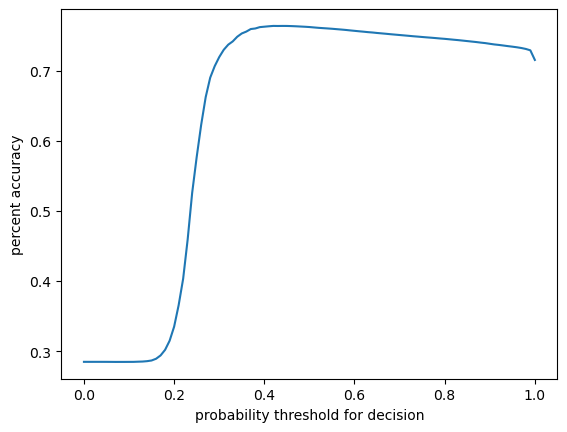

In [161]:
plt.plot(thresholds, final_scores_df['accuracy'].values)

plt.xlabel("probability threshold for decision")

plt.ylabel("percent accuracy")

- (above & below) looks like 0.44 is a better decision rule.

In [162]:
final_scores_df.query('0.40 <= threshold <= 0.60')

,threshold,tp,fp,fn,tn,accuracy,precision,recall/tpr,fpr
40,0.40,5616.2,1450.0,19402.4,61359.8,0.762578,0.794814,0.224479,0.023086
41,0.41,5483.8,1265.2,19534.8,61544.6,0.763175,0.812520,0.219188,0.020143
42,0.42,5366.6,1103.0,19652.0,61706.8,0.763687,0.829490,0.214504,0.017561
43,0.43,5256.4,1001.2,19762.2,61808.6,0.763591,0.839985,0.210099,0.015940
44,0.44,5161.2,898.8,19857.4,61911.0,0.763673,0.851663,0.206291,0.014310
45,0.45,5077.8,818.6,19940.8,61991.2,0.763637,0.861151,0.202960,0.013033
46,0.46,4989.6,747.6,20029.0,62062.2,0.763441,0.869655,0.199432,0.011903
47,0.47,4913.6,695.2,20105.0,62114.6,0.763172,0.876023,0.196396,0.011068
48,0.48,4831.6,642.8,20187.0,62167.0,0.762835,0.882543,0.193117,0.010234
49,0.49,4761.2,601.8,20257.4,62208.0,0.762501,0.887743,0.190302,0.009581


In [163]:
phishing_decision = (y_val_pred >= 0.44)
phishing_decision

array([False, False, False, ..., False, False, False])

In [164]:
len(y_val), len(phishing_decision)

(109786, 109786)

In [165]:
accuracy_score(y_val, phishing_decision)

0.7630207858925546

#### tune the regularization parameter

- (below) A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. "Trust this training data a lot"
- (below) A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".

In [166]:
n_splits = 5

reg_vals = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

for C in tqdm(reg_vals, total = len(reg_vals), desc = "Regularization iterations"):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train_fold = df_full_train.iloc[train_idx]
        df_val_fold = df_full_train.iloc[val_idx]

        y_train_fold = y_full_train[train_idx]
        y_val_fold = y_full_train[val_idx]

        model_fold = train(df_train_fold, y_train_fold, C = C)
        y_pred_fold = predict(df_val_fold, model_fold)

        auc = roc_auc_score(y_val_fold, y_pred_fold)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

Regularization iterations:   0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.614 +- 0.001
C=0.01 0.617 +- 0.002
C=0.1 0.617 +- 0.002
C=0.5 0.617 +- 0.002
C=1 0.617 +- 0.002
C=5 0.617 +- 0.002
C=10 0.617 +- 0.002
